<a href="https://colab.research.google.com/github/xiaofengyyy/tabpfn/blob/main/TabPFN_Demo_V1_Local.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

Welcome to the hands-on Colab notebook for TabPFN!
This code shows how to locally (with GPU support) install and run TabPFN. For fast inference with additional features use **[TabPFN client](https://tinyurl.com/tabpfn-colab-online)**.

**Installation**
* First, copy the notebook to be able to modify it.
* Then, run the cells in the installation block, this should
be good enough!

---

> 🔵 **Hint** <br>
We recommend first enabling the **Table of Contents** with the `☰` icon in the top left and collapsing all sections by selecting all cells `Ctrl + Shift + A` and then pressing `Ctrl + ]`.

---

Thank you to [Lennart Purucker](https://github.com/LennartPurucker) for providing the original version of this notebook!

# Installation

Restart your runtime and rerun the *cell*, if Colab asks for it.

In [ ]:
# Install sklearn
!pip install scikit-learn==1.5.2

# Install TabPFN
!pip install tabpfn

# TabPFN Community installs optional functionalities around the TabPFN model
# These include post-hoc ensembles, interpretability tools, and more
!git clone https://github.com/PriorLabs/tabpfn-community
!pip install -e tabpfn-community[post_hoc_ensembles,interpretability,hpo]

# Install Baselines
!pip install catboost xgboost

# Install example datasets
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 78.9 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.1
    Uninstalling scikit-learn-1.6.1:
      Successfully uninstalled scikit-learn-1.6.1
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.5/105.5 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 67.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 47.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 42.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
!git clone https://github.com/PriorLabs/tabpfn-extensions
!pip install -e tabpfn-extensions[post_hoc_ensembles,interpretability,hpo]


Cloning into 'tabpfn-extensions'...
remote: Enumerating objects: 526, done.
remote: Counting objects: 100% (251/251), done.
remote: Compressing objects: 100% (152/152), done.
remote: Total 526 (delta 131), reused 140 (delta 77), pack-reused 275 (from 1)
Receiving objects: 100% (526/526), 295.37 KiB | 1.51 MiB/s, done.
Resolving deltas: 100% (262/262), done.
Obtaining file:///content/tabpfn-extensions
  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... done
  Preparing editable metadata (pyproject.toml) ... done
  Building editable for tabpfn-community (pyproject.toml) ... done
  Created wheel for tabpfn-community: filename=tabpfn_community-0.0.4-0.editable-py3-none-any.whl size=11205 sha256=3ff6908b1caf5365e43ce8a0a3aaa4c0c99e17df6dce3994b6f4d156670d442c
  Stored in directory: /tmp/pip-ephem-wheel-cache-jhac7u0p/wheels/8f/b7/2c/ec18b502697068b39e1503426a50b729bdac046bed4810759d
Successfully b

**Now Restart the Runtime**

# Necessary Imports for the Notebook

The examples in this notebook require the following imports.
Make sure to run this cell before any other cell.




### In order to get the fastest predictions you need to enable GPUs for the notebook:
* Navigate to Edit→Notebook Settings
* select GPU from the Hardware Accelerator drop-down

In [ ]:
import os

# Setup Imports
import pandas as pd
import numpy as np

from sklearn.datasets import load_breast_cancer, load_diabetes, load_iris
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import (
    accuracy_score,
    mean_absolute_error,
    mean_squared_error,
    root_mean_squared_error,
    r2_score,
    roc_auc_score,
)
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.inspection import DecisionBoundaryDisplay

from sklearn.datasets import fetch_openml
from sklearn.preprocessing import LabelEncoder
from IPython.display import display, Markdown, Latex

# Baseline Imports
from xgboost import XGBClassifier, XGBRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from catboost import CatBoostClassifier, CatBoostRegressor

import torch

from tabpfn import TabPFNClassifier, TabPFNRegressor

if not torch.cuda.is_available():
    raise SystemError('GPU device not found. For fast training, please enable GPU. See section above for instructions.')

# Predicting with TabPFN

For our first example, we will use the client to predict on [toy data from scikit-learn](https://scikit-learn.org/stable/datasets/toy_dataset.html).

## Classification

We now compare the classification performance of TabPFN, [XGBoost](https://xgboost.readthedocs.io/en/stable/), and [CatBoost](https://catboost.ai/) on the toy data from scikit-learn.

We measure classification performance using [ROC AUC](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html). These toy datasets are simple to solve, so the ROC AUC will be very high.

In [ ]:
# Parkinson's Disease dataset: Predict Parkinson's disease presence
# Features: Voice measurements (e.g., frequency, amplitude)
# Samples: 195 cases
df = fetch_openml('parkinsons')

# Alternative datasets (commented for reference):

# German Credit Fraud (ID: 31)
# Samples: 1,000
# Features: 20 (account info, credit history, employment)
# Target: Good/Bad credit risk
# df = fetch_openml(data_id=31)

# Cholesterol dataset: Predict cholesterol levels
# Features: Patient characteristics, medical measurements
# Samples: 303 patients
# Target: Cholesterol levels in mg/dl
# df = fetch_openml('cholesterol', version=2, as_frame=True)

# Primary Tumor dataset: Predict tumor type and size
# Features: Patient symptoms, medical test results
# Samples: 339 patients
# Target: Tumor classification and size
# df = fetch_openml('primary-tumor', version=1, as_frame=True) - too many classes!

# Heart Disease dataset (Statlog): Predict presence of heart disease
# Features: Clinical and test measurements
# Samples: 270 patients
# Target: Binary heart disease diagnosis
# df = fetch_openml("heart-statlog", version=1)

# Diabetes dataset: Predict diabetes presence
# Features: Medical measurements, patient history
# Samples: 768 patients
# Target: Binary diabetes diagnosis
#df = fetch_openml("diabetes", version=1)

# Hypothyroid dataset: Predict thyroid condition
# Features: Blood test results, patient symptoms
# Samples: 3772 patients
# Target: Thyroid condition classification
# df = fetch_openml('hypothyroid')

X, y = df.data, df.target

# Encode target labels to classes
le = LabelEncoder()
y = le.fit_transform(y)

# Convert all categorical columns to numeric
for col in X.select_dtypes(['category']).columns:
    X[col] = X[col].cat.codes

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Print dataset description
display(Markdown(df['DESCR']))

display(X)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - class:
            - WDBC-Malignant
            - WDBC-Benign

:Summary Statistics:

===================================== ====== ======
                                        Min    Max
===================================== ====== ======
radius (mean):                        6.981  28.11
texture (mean):                       9.71   39.28
perimeter (mean):                     43.79  188.5
area (mean):                          143.5  2501.0
smoothness (mean):                    0.053  0.163
compactness (mean):                   0.019  0.345
concavity (mean):                     0.0    0.427
concave points (mean):                0.0    0.201
symmetry (mean):                      0.106  0.304
fractal dimension (mean):             0.05   0.097
radius (standard error):              0.112  2.873
texture (standard error):             0.36   4.885
perimeter (standard error):           0.757  21.98
area (standard error):                6.802  542.2
smoothness (standard error):          0.002  0.031
compactness (standard error):         0.002  0.135
concavity (standard error):           0.0    0.396
concave points (standard error):      0.0    0.053
symmetry (standard error):            0.008  0.079
fractal dimension (standard error):   0.001  0.03
radius (worst):                       7.93   36.04
texture (worst):                      12.02  49.54
perimeter (worst):                    50.41  251.2
area (worst):                         185.2  4254.0
smoothness (worst):                   0.071  0.223
compactness (worst):                  0.027  1.058
concavity (worst):                    0.0    1.252
concave points (worst):               0.0    0.291
symmetry (worst):                     0.156  0.664
fractal dimension (worst):            0.055  0.208
===================================== ====== ======

:Missing Attribute Values: None

:Class Distribution: 212 - Malignant, 357 - Benign

:Creator:  Dr. William H. Wolberg, W. Nick Street, Olvi L. Mangasarian

:Donor: Nick Street

:Date: November, 1995

This is a copy of UCI ML Breast Cancer Wisconsin (Diagnostic) datasets.
https://goo.gl/U2Uwz2

Features are computed from a digitized image of a fine needle
aspirate (FNA) of a breast mass.  They describe
characteristics of the cell nuclei present in the image.

Separating plane described above was obtained using
Multisurface Method-Tree (MSM-T) [K. P. Bennett, "Decision Tree
Construction Via Linear Programming." Proceedings of the 4th
Midwest Artificial Intelligence and Cognitive Science Society,
pp. 97-101, 1992], a classification method which uses linear
programming to construct a decision tree.  Relevant features
were selected using an exhaustive search in the space of 1-4
features and 1-3 separating planes.

The actual linear program used to obtain the separating plane
in the 3-dimensional space is that described in:
[K. P. Bennett and O. L. Mangasarian: "Robust Linear
Programming Discrimination of Two Linearly Inseparable Sets",
Optimization Methods and Software 1, 1992, 23-34].

This database is also available through the UW CS ftp server:

ftp ftp.cs.wisc.edu
cd math-prog/cpo-dataset/machine-learn/WDBC/

.. dropdown:: References

  - W.N. Street, W.H. Wolberg and O.L. Mangasarian. Nuclear feature extraction
    for breast tumor diagnosis. IS&T/SPIE 1993 International Symposium on
    Electronic Imaging: Science and Technology, volume 1905, pages 861-870,
    San Jose, CA, 1993.
  - O.L. Mangasarian, W.N. Street and W.H. Wolberg. Breast cancer diagnosis and
    prognosis via linear programming. Operations Research, 43(4), pages 570-577,
    July-August 1995.
  - W.H. Wolberg, W.N. Street, and O.L. Mangasarian. Machine learning techniques
    to diagnose breast cancer from fine-needle aspirates. Cancer Letters 77 (1994)
    163-171.


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=6)

# Train and evaluate TabPFN
y_pred = TabPFNClassifier(random_state=42).fit(X_train, y_train).predict_proba(X_test)

# Calculate ROC AUC (handles both binary and multiclass)
score = roc_auc_score(y_test, y_pred if len(np.unique(y)) > 2 else y_pred[:, 1])
print(f"TabPFN ROC AUC: {score:.4f}")

TabPFN ROC AUC: 0.9985


Text(0.5, 1.0, 'Model Comparison - 5-fold Cross-validation')

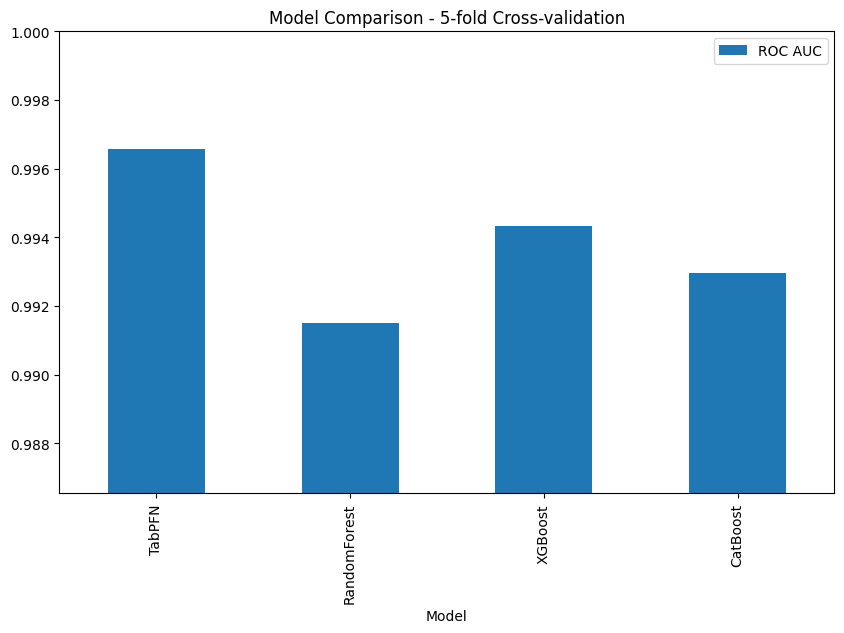

In [ ]:
# Compare different machine learning models by training each one multiple times
# on different parts of the data and averaging their performance scores for a
# more reliable performance estimate

# Define models
models = [
    ('TabPFN', TabPFNClassifier(random_state=42)),
    ('RandomForest', RandomForestClassifier(random_state=42)),
    ('XGBoost', XGBClassifier(random_state=42)),
    ('CatBoost', CatBoostClassifier(random_state=42, verbose=0))
]

# Calculate scores
scoring = 'roc_auc_ovr' if len(np.unique(y)) > 2 else 'roc_auc'
scores = {name: cross_val_score(model, X, y, cv=5, scoring=scoring, n_jobs=1, verbose=1).mean()
          for name, model in models}

# Plot results
df = pd.DataFrame(list(scores.items()), columns=['Model', 'ROC AUC'])
ax = df.plot(x='Model', y='ROC AUC', kind='bar', figsize=(10, 6))
ax.set_ylim(df['ROC AUC'].min() * 0.995, min(1.0, df['ROC AUC'].max() * 1.005))
ax.set_title('Model Comparison - 5-fold Cross-validation')

### Best Quality Models (Recommended Use) - Post Hoc Ensembles

In [ ]:
from tabpfn_extensions.post_hoc_ensembles.sklearn_interface import AutoTabPFNClassifier

# Binary
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42
)
clf = AutoTabPFNClassifier(max_time=30) # runs for 30 seconds, longer ensembling time leads to better results
clf.fit(X_train, y_train)
prediction_probabilities = clf.predict_proba(X_test)
predictions = np.argmax(prediction_probabilities, axis=-1)

print("ROC AUC:", roc_auc_score(y_test, prediction_probabilities[:, 1]))
print("Accuracy", accuracy_score(y_test, predictions))

ModuleNotFoundError: No module named 'tabpfn_extensions'

## Regression

We now compare the regression performance of TabPFN, [XGBoost](https://xgboost.readthedocs.io/en/stable/), and [CatBoost](https://catboost.ai/) on the toy data from scikit-learn.

We measure regression performance using [Root Mean Squared Error](https://scikit-learn.org/1.5/modules/generated/sklearn.metrics.root_mean_squared_error.html).

In [ ]:
# Boston Housing dataset
# Regression task: Predict house prices
# Features: Neighborhood characteristics, housing attributes
# Samples: 506 neighborhoods
# Target: Median house value in $1000s
df = fetch_openml(data_id=531, as_frame=True)

# Alternative datasets (commented for reference):

# Liver Disorders dataset
# Classification task: Predict liver disorder presence
# Features: Blood test results, alcohol consumption
# Samples: 345 patients
# Target: Binary liver disorder diagnosis
# df = fetch_openml("liver-disorders", version=1)

# Grid Stability dataset
# Regression task: Predict electrical grid stability
# Features: Power system measurements, grid parameters
# Samples: 10,000 simulations
# Target: Grid stability score
#df = fetch_openml(data_id=44973, as_frame=True)

# Concrete Compressive Strength dataset
# Regression task: Predict concrete strength
# Features: Concrete components (cement, water, aggregates)
# Samples: 1,030 concrete samples
# Target: Compressive strength in MPa
#df = fetch_openml(data_id=44959, as_frame=True)

X, y = df.data, df.target

# Convert all 'object' and 'category' columns to numeric
for col in X.select_dtypes(['object', 'category']).columns:
    X[col] = pd.factorize(X[col])[0]  # Factorize encodes as integers

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Print dataset description
display(Markdown(df['DESCR']))

display(X)

In [ ]:
# Train and evaluate TabPFN
reg = TabPFNRegressor(random_state=42)
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

# Calculate Variance Explained (R2 Score)
score = root_mean_squared_error(y_test, y_pred)
print(f"TabPFN RMSE: {score:.4f}")

In [ ]:
# Compare different machine learning models by training each one multiple times
# on different parts of the data and averaging their performance scores for a
# more reliable performance estimate

# Define models
models = [
    ('TabPFN', TabPFNRegressor(random_state=42)),
    ('RandomForest', RandomForestRegressor(random_state=42)),
    ('XGBoost', XGBRegressor(random_state=42)),
    ('CatBoost', CatBoostRegressor(random_state=42, verbose=0))
]

# Calculate scores
scoring = 'neg_root_mean_squared_error'
scores = {name: cross_val_score(model, X, y, cv=5, scoring=scoring, n_jobs=-1).mean()
          for name, model in models}


# Plot results
df = pd.DataFrame(list(scores.items()), columns=['Model', 'RMSE'])
df.RMSE = -df.RMSE # Smaller is better
ax = df.plot(x='Model', y='RMSE', kind='bar', figsize=(10, 6))
ax.set_ylim(df['RMSE'].min() * 0.99, df['RMSE'].max() * 1.01)
ax.set_title('Model Comparison - 5-fold Cross-validation \n (Root Mean Squared Error - Smaller is better)')

### Best Quality Models (Recommended Use) - Post Hoc Ensembles

In [ ]:
from tabpfn_community.post_hoc_ensembles.sklearn_interface import AutoTabPFNRegressor

# Regression
X, y = load_diabetes(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.33,
    random_state=42,
)
reg = AutoTabPFNRegressor(max_time=30) # runs for 30 seconds
reg.fit(X_train, y_train)
predictions = reg.predict(X_test)
print("Mean Squared Error (MSE):", mean_squared_error(y_test, predictions))
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, predictions))
print("R-squared (R^2):", r2_score(y_test, predictions))

# Predictive Behavior of TabPFN

In this section, we explore the behavior of predictions from TabPFN on various toy functions.

## Decision Boundary during Classification

First, let us inspect the decision boundary for different classifiers.
The decision bounds show how smoothly a model learns to transition between classes and how well it fits the data.

In the first cell, we create the data and code to plot the decision boundary. The second cell then generates the plot.

In [ ]:
# Toy functions that generate the data
def generate_circle(n_datapoints, radius, noise_factor):
    angles = np.linspace(0, 2*np.pi, n_datapoints).T
    x = radius * np.cos(angles) + np.random.randn(n_datapoints) * noise_factor
    y = radius * np.sin(angles) + np.random.randn(n_datapoints) * noise_factor

    return np.stack([x, y]).T

def generate_concentric_cirlces(radii, num_points_per_circle, noise_factor=1/15):
    circles = []
    for r, num_points in zip(radii, num_points_per_circle):
        circles.append(generate_circle(num_points, r, noise_factor))

    circle = np.vstack(circles)
    return circle

def generate_circle_data(num_points_per_circle, radii, noise_factor):
    radii = np.array(radii)
    circles_1 = generate_concentric_cirlces(radii, num_points_per_circle, noise_factor)
    circles_1 = np.hstack([circles_1, np.zeros((sum(num_points_per_circle) , 1))])

    circles_2 = generate_concentric_cirlces(radii + 0.3, num_points_per_circle, noise_factor)
    circles_2 = np.hstack([circles_2, np.ones((sum(num_points_per_circle), 1))])

    circles = np.vstack([circles_1, circles_2])
    X, y = circles[:, :2], circles[:, 2]
    return X, y

# Generate the data
X_train, y_train = generate_circle_data(
  num_points_per_circle=[50, 100, 200],
  radii=[1,2,4],
  noise_factor=0.1
)

# Function for plotting
def plot_decision_boundary(ax, model, model_name):
    cmap = ListedColormap(["#FF0000", "#0000FF"])
    ax.set_title(model_name)
    DecisionBoundaryDisplay.from_estimator(
        model, X_train[:, :2], alpha=0.6, ax=ax, eps=0.2, grid_resolution=50, response_method="predict_proba", cmap=plt.cm.RdBu,
    )
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train > 0, cmap=cmap)

In [ ]:
rf = RandomForestClassifier().fit(X_train[:, :2], y_train)
xgb = XGBClassifier().fit(X_train[:, :2], y_train)
tabpfn = TabPFNClassifier().fit(X_train[:, :2], y_train)

# Create a 2x2 subplot layout
fig, axes = plt.subplots(2, 2, figsize=(7,7))

# Plot Train Points
ax_points = axes[0, 0]
ax_points.set_title("Train points")
ax_points.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=ListedColormap(["#FF0000", "#0000FF"]))

# Plot Random Forest
ax_rf = axes[0, 1]
plot_decision_boundary(ax_rf, rf, "Random Forest")

# Plot XGBoost
ax_xgb = axes[1, 0]
plot_decision_boundary(ax_xgb, xgb, "XGBoost")

# Plot TabPFN
ax_tabpfn = axes[1, 1]
plot_decision_boundary(ax_tabpfn, tabpfn, "TabPFN")

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

## Sin Curve Fitting with Regression

Next, we investigate the curve-fitting behavior of the different models on a sin curve.

In [ ]:
# Toy function to generate data
def generate_sinx_plus_x(N):
    x = np.linspace(0, 20, N)
    y = np.sin(x) + x/10

    return x.reshape(-1, 1), y

# Utility function for plotting
def plot_predictions(ax, model, model_name):
    X_test = np.linspace(0, 20, 200).reshape(-1, 1) # Predict for 200 points  between 0 and 20
    y_preds = model.predict(X_test)
    ax.set_title(model_name)
    ax.scatter(X_test, y_preds, label="Predictions")
    ax.scatter(X_train, y_train, label="Train points")
    ax.legend()

# Generate data
X_train, y_train = generate_sinx_plus_x(N=40)

# Fit Models
rf = RandomForestRegressor(random_state=42).fit(X_train, y_train)
xgb = XGBRegressor(random_state=42).fit(X_train, y_train)
tabpfn = TabPFNRegressor()
tabpfn.fit(X_train, y_train)

# Create a 2x2 subplot layout
fig, axs = plt.subplots(2, 2, figsize=(14, 12))

# Plot train points
ax_points = axs[0, 0]
ax_points.set_title("Train points")
ax_points.scatter(X_train, y_train, label="Train points")
ax_points.legend()

# Plot predictions for Random Forest
ax_rf = axs[0, 1]
plot_predictions(ax_rf, rf, "Random Forest")

# Plot predictions for XGBoost
ax_xgb = axs[1, 0]
plot_predictions(ax_xgb, xgb, "XGBoost")

# Plot predictions for TabPFN
ax_tabpfn = axs[1, 1]
plot_predictions(ax_tabpfn, tabpfn, "TabPFN")

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

## Uncertainty of TabPFN / Quantile Regresison

---



TabPFN is trained to predict the distribution of the target variable and not just a single point. This is also the case for regression.

As a result, we natively obtain uncertainty for the predictions of TabPFN (without the need for a new model or repeating models for different quantiles).

In the following, we plot the uncertainty of TabPFN for a toy function with noise.

In [ ]:
### Code to generate the plot (feel free to ignore)
def plot_regression_uncertainty(ax, x, y_line, y_noisy, x_test, full_preds, color_multiplier=5):
  all_quantiles = preds[f"quantiles"]
  y = np.array(all_quantiles) # shape of y: (9, number of samples)

  # Calculate the maximum and minimum values in y
  y_max = np.max(y, axis=0)
  y_min = np.min(y, axis=0)

  # Calculate the widths of each quantile bin
  quantile_bin_widths = np.diff(y, axis=0) # shape of quantile_bin_widths: (8, number of samples)

  # Normalize the bin widths for a given x
  per_x_normalized_bin_widths = (quantile_bin_widths) / (y_max - y_min)

  # Plotting
  num_bins, num_data_points = per_x_normalized_bin_widths.shape[0], per_x_normalized_bin_widths.shape[1]
  rect_width = (x_test[1] - x_test[0]).squeeze() # assuming the x query points are equally spaced out

  for i in range(num_data_points):
      for j in range(num_bins):
          rect_height = quantile_bin_widths[j, i]
          rect = plt.Rectangle(
                    xy=(x_test[i][0] - rect_width / 2, y[j, i]),
                    width=rect_width,
                    height=quantile_bin_widths[j, i],
                    facecolor=plt.cm.viridis(per_x_normalized_bin_widths[j, i] * color_multiplier),
                    edgecolor='none'
                )
          ax.add_patch(rect)

  # Set limits and labels
  ax.plot(x, y_line, label='True line', color='blue')
  ax.set_xlim(min(x_test) - 1, max(x_test) + 1)
  ax.set_ylim(np.min(y_noisy) - 1, np.max(y_noisy) + 1)
  ax.set_xlabel('X')
  ax.set_ylabel('Y')

  # ax.plot(x, y, label='True line', color='blue')
  ax.scatter(x, y_noisy, label='Noisy data', color='red', s=10)

  plt.title('TabPFN Regression Uncertainty')
  plt.show()

# Generate Data
def generate_line_with_heteroscedastic_noise(m=0.8, num_points=200, x_start=0, x_end=100, noise_factor=0.1):
    x = np.linspace(x_start, x_end, num_points)
    noise = np.random.randn(num_points)
    y = m * x
    y_noisy = y + (noise * noise_factor * x)

    return x.reshape(-1, 1), y, y_noisy

def generate_line_with_heteroscedastic_noise_with_gap(m=0.8, num_points=200, x_start=0, x_end=100, noise_factor=0.1):
    extra_points = num_points // 3
    x, y, y_noisy = generate_line_with_heteroscedastic_noise(m, num_points+extra_points, x_start, x_end, noise_factor)
    a = np.arange(num_points + extra_points)
    idx = np.where((a < num_points/3) | (a > num_points/3 + extra_points))
    return x[idx], y[idx], y_noisy[idx]

x, y_line, y_noisy = generate_line_with_heteroscedastic_noise_with_gap(0.8)
x_test = np.linspace(0, 100, 200).reshape(-1, 1)

In [ ]:
reg = TabPFNRegressor()
reg.fit(x, y_noisy)
preds = reg.predict(x_test, output_type="full")

In [ ]:
fig = plt.figure(figsize=(12,6))

# Plot the original data
ax = fig.add_subplot(121)
ax.plot(x, y_line, label='True line', color='blue')
ax.scatter(x, y_noisy, label='Noisy data', color='red', s=10)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_xlim(min(x) - 1, max(x) + 1)
ax.set_ylim(np.min(y_noisy) - 1, np.max(y_noisy) + 1)
ax.set_title('Heteroscedastic Noise along a Sloping Line')
ax.legend()

# plot the uncertainty estimates obtained from TabPFN
ax = fig.add_subplot(122)
plot_regression_uncertainty(ax, x, y_line, y_noisy, x_test, preds, color_multiplier=5)

## BATMAN

Na na na na

na na na na

na na na na na

Batman

In [ ]:
# "Just run this, no questions" - Batman
!wget -nc https://github.com/PriorLabs/TabPFNDemoFiles/raw/main/thebat.npy # download a file we need

def sample_random_points(n, array, seed):
    np.random.seed(seed)
    x, y = np.random.randint(0, array.shape[1], (n,)), np.random.randint(0, array.shape[0], (n,))
    return np.vstack((x, y)).T, array[y, x].reshape(-1, 1).flatten()

def plot_for_all_models(n_train_points, data_source="thebat.npy", random_state=9001):
    # Load the data
    data_array = np.load(data_source)
    X_train, y_train = sample_random_points(n_train_points, data_array, random_state)

    # Fit models
    xgb = XGBClassifier(random_state=42).fit(X_train, y_train)
    catboost = CatBoostClassifier(random_state=42, verbose=0).fit(X_train, y_train)
    tabpfn = TabPFNClassifier()
    tabpfn.fit(X_train, y_train)

    ####### PLOTTING  #######
    cmap = ListedColormap(["black", "yellow"])
    def plot_decision_boundary(ax, model, model_name):
        ax.set_title(model_name)
        ax.set_aspect("equal")
        DecisionBoundaryDisplay.from_estimator(
            model, X_train, alpha=0.8, ax=ax, eps=0.2, grid_resolution=50, response_method="predict_proba", cmap=cmap
        )
        # ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train > 0, cmap=cmap)

    fig = plt.figure(figsize=(32,8))

    ### Plot Train Points ###
    ax_points = fig.add_subplot(141)
    ax_points.set_title(f"Train points ({n_train_points})")
    ax_points.set_aspect("equal")
    ax_points.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap)

    ### Plot XGBoost ###
    ax_xgb = fig.add_subplot(142)
    plot_decision_boundary(ax_xgb, xgb, "XGBoost")

    ### Plot Random Forest ###
    ax_catboost = fig.add_subplot(143)
    plot_decision_boundary(ax_catboost, catboost, "CatBoost")

    ### Plot TabPFN ###
    ax_tabpfn = fig.add_subplot(144)
    plot_decision_boundary(ax_tabpfn, tabpfn, "TabPFN")

plot_for_all_models(n_train_points=2500, data_source="thebat.npy", random_state=9001)

## Random Search

In [ ]:
from tabpfn_community.hpo import (
    TunedTabPFNRegressor,
    TunedTabPFNClassifier,
)

# Binary
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42
)
clf = TunedTabPFNClassifier()
clf.fit(X_train, y_train)
prediction_probabilities = clf.predict_proba(X_test)
predictions = np.argmax(prediction_probabilities, axis=-1)

print("ROC AUC:", roc_auc_score(y_test, prediction_probabilities[:, 1]))
print("Accuracy", accuracy_score(y_test, predictions))

# Multiclass
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.33,
    random_state=42,
)
clf = TunedTabPFNClassifier()
clf.fit(X_train, y_train)
prediction_probabilities = clf.predict_proba(X_test)
predictions = np.argmax(prediction_probabilities, axis=-1)

print("ROC AUC:", roc_auc_score(y_test, prediction_probabilities, multi_class="ovr"))
print("Accuracy", accuracy_score(y_test, predictions))

# Regression
X, y = load_diabetes(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.33,
    random_state=42,
)
reg = TunedTabPFNRegressor()
reg.fit(X_train, y_train)
predictions = reg.predict(X_test)
print("Mean Squared Error (MSE):", mean_squared_error(y_test, predictions))
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, predictions))
print("R-squared (R^2):", r2_score(y_test, predictions))

# Interpretability

## SHAP

In [ ]:
from tabpfn_community import interpretability

# Load example dataset
data = load_breast_cancer()
X, y = data.data, data.target
feature_names = data.feature_names
n_samples = 50

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.5
)

# Initialize and train model
clf = TabPFNClassifier()
clf.fit(X_train, y_train)

# Calculate SHAP values
shap_values = interpretability.shap.get_shap_values(
    estimator=clf,
    test_x=X_test[:n_samples],
    attribute_names=feature_names,
    algorithm="permutation",
)

# Create visualization
fig = interpretability.shap.plot_shap(shap_values)


## Feature selection

In [ ]:
from tabpfn_community import interpretability

# Load data
data = load_breast_cancer()
X, y = data.data, data.target
feature_names = data.feature_names

# Initialize model
clf = TabPFNClassifier(n_estimators=3)

# Feature selection
sfs = interpretability.feature_selection.feature_selection(
    estimator=clf,
    X=X,
    y=y,
    n_features_to_select=5,
    feature_names=feature_names
)

# Print selected features
selected_features = [feature_names[i] for i in range(len(feature_names)) if sfs.get_support()[i]]
print("\nSelected features:")
for feature in selected_features:
    print(f"- {feature}")

# Unsupervised

## Data Generation / Outlier Detection

In [ ]:
from tabpfn_community import unsupervised

# Load and prepare breast cancer dataset
df = load_breast_cancer(return_X_y=False)
X, y = df['data'], df['target']
feature_names = df['feature_names']

# Initialize TabPFN models
model_unsupervised = unsupervised.TabPFNUnsupervisedModel(
    tabpfn_clf=TabPFNClassifier(),
    tabpfn_reg=TabPFNRegressor()
)

# Select features for synthetic data generation
# Example features: [mean texture, mean area, mean concavity]
feature_indices = [4, 6, 12]

# Run synthetic data generation experiment
experiment = unsupervised.experiments.GenerateSyntheticDataExperiment(
    task_type='unsupervised'
)

results = experiment.run(
    tabpfn=model_unsupervised,
    X=torch.tensor(X),
    y=torch.tensor(y),
    attribute_names=feature_names,
    temp=1.0,  # Temperature parameter for sampling
    n_samples=X.shape[0] * 2,  # Generate twice as many samples as original data
    indices=feature_indices
)

## Outlier detection

In [ ]:
import torch
from sklearn.datasets import load_breast_cancer
from tabpfn_community import unsupervised
from tabpfn_community import TabPFNClassifier, TabPFNRegressor

# Load data
df = load_breast_cancer(return_X_y=False)
X, y = df["data"], df["target"]
attribute_names = df["feature_names"]

# Initialize models
clf = TabPFNClassifier(n_estimators=4)
reg = TabPFNRegressor(n_estimators=4)
model_unsupervised = unsupervised.TabPFNUnsupervisedModel(
    tabpfn_clf=clf, tabpfn_reg=reg
)

# Run outlier detection
exp_outlier = unsupervised.experiments.OutlierDetectionUnsupervisedExperiment(
    task_type="unsupervised"
)
results = exp_outlier.run(
    tabpfn=model_unsupervised,
    X=torch.tensor(X),
    y=torch.tensor(y),
    attribute_names=attribute_names,
    indices=[4, 12],  # Analyze features 4 and 12
)